In [8]:
#! /usr/bin/env python
# -*- coding: UTF8 -*-
# This file is part of  program Meggido
# Copyright © 2021  Carlo Oliveira <carlo@nce.ufrj.br>,
# `Labase <http://labase.selfip.org/>`__; `GPL <http://is.gd/3Udt>`__.
# SPDX-License-Identifier: (GPLv3-or-later AND LGPL-2.0-only) WITH bison-exception

"""Handle Meggido time series up to check Marques Resonance.

    This module reads instrumented data collected from Meggido game.

Changelog
---------
    21.01
        * NEW: Initial Implementation.
"""

import pandas as pd
data = pd.read_csv('grupo.csv')
print(data)

        user  act    time
0         16  aro       0
1         16  aro       4
2         16  aro       8
3         16  aro      12
4         16  aro      16
...      ...  ...     ...
150754    17  ana  288630
150755    12  aca  288630
150756    11  aca  288635
150757    17  ana  288635
150758    12  aca  288635

[150759 rows x 3 columns]


In [18]:
import pandas as pd
data = pd.read_csv('grupo.csv')
df_16 = data[data['user'] == 16]
df_act = df_16[['act']]
#print(df_act)
df_act['act'].value_counts()

aro    9857
aca    1455
dcr     216
sro     142
pco      47
sca      10
per       3
Name: act, dtype: int64

In [19]:
import pandas as pd
data = pd.read_csv('grupo.csv')
df_16 = data[data['user'] == 17]
df_act = df_16[['act']]
#print(df_act)
df_act['act'].value_counts()

ana    23041
aga    11373
aro     2603
aca     2416
rca      434
rro      434
rpe      433
rco      432
pco      122
dcr       22
sro       16
cna       12
sna       11
per        6
sca        5
Name: act, dtype: int64

In [20]:
import pandas as pd
data = pd.read_csv('grupo.csv')
df_16 = data[data['user'] == 12]
df_act = df_16[['act']]
#print(df_act)
df_act['act'].value_counts()

aca    34561
pco     2080
aro     1772
sro       82
sca       62
per       32
dcr       23
Name: act, dtype: int64

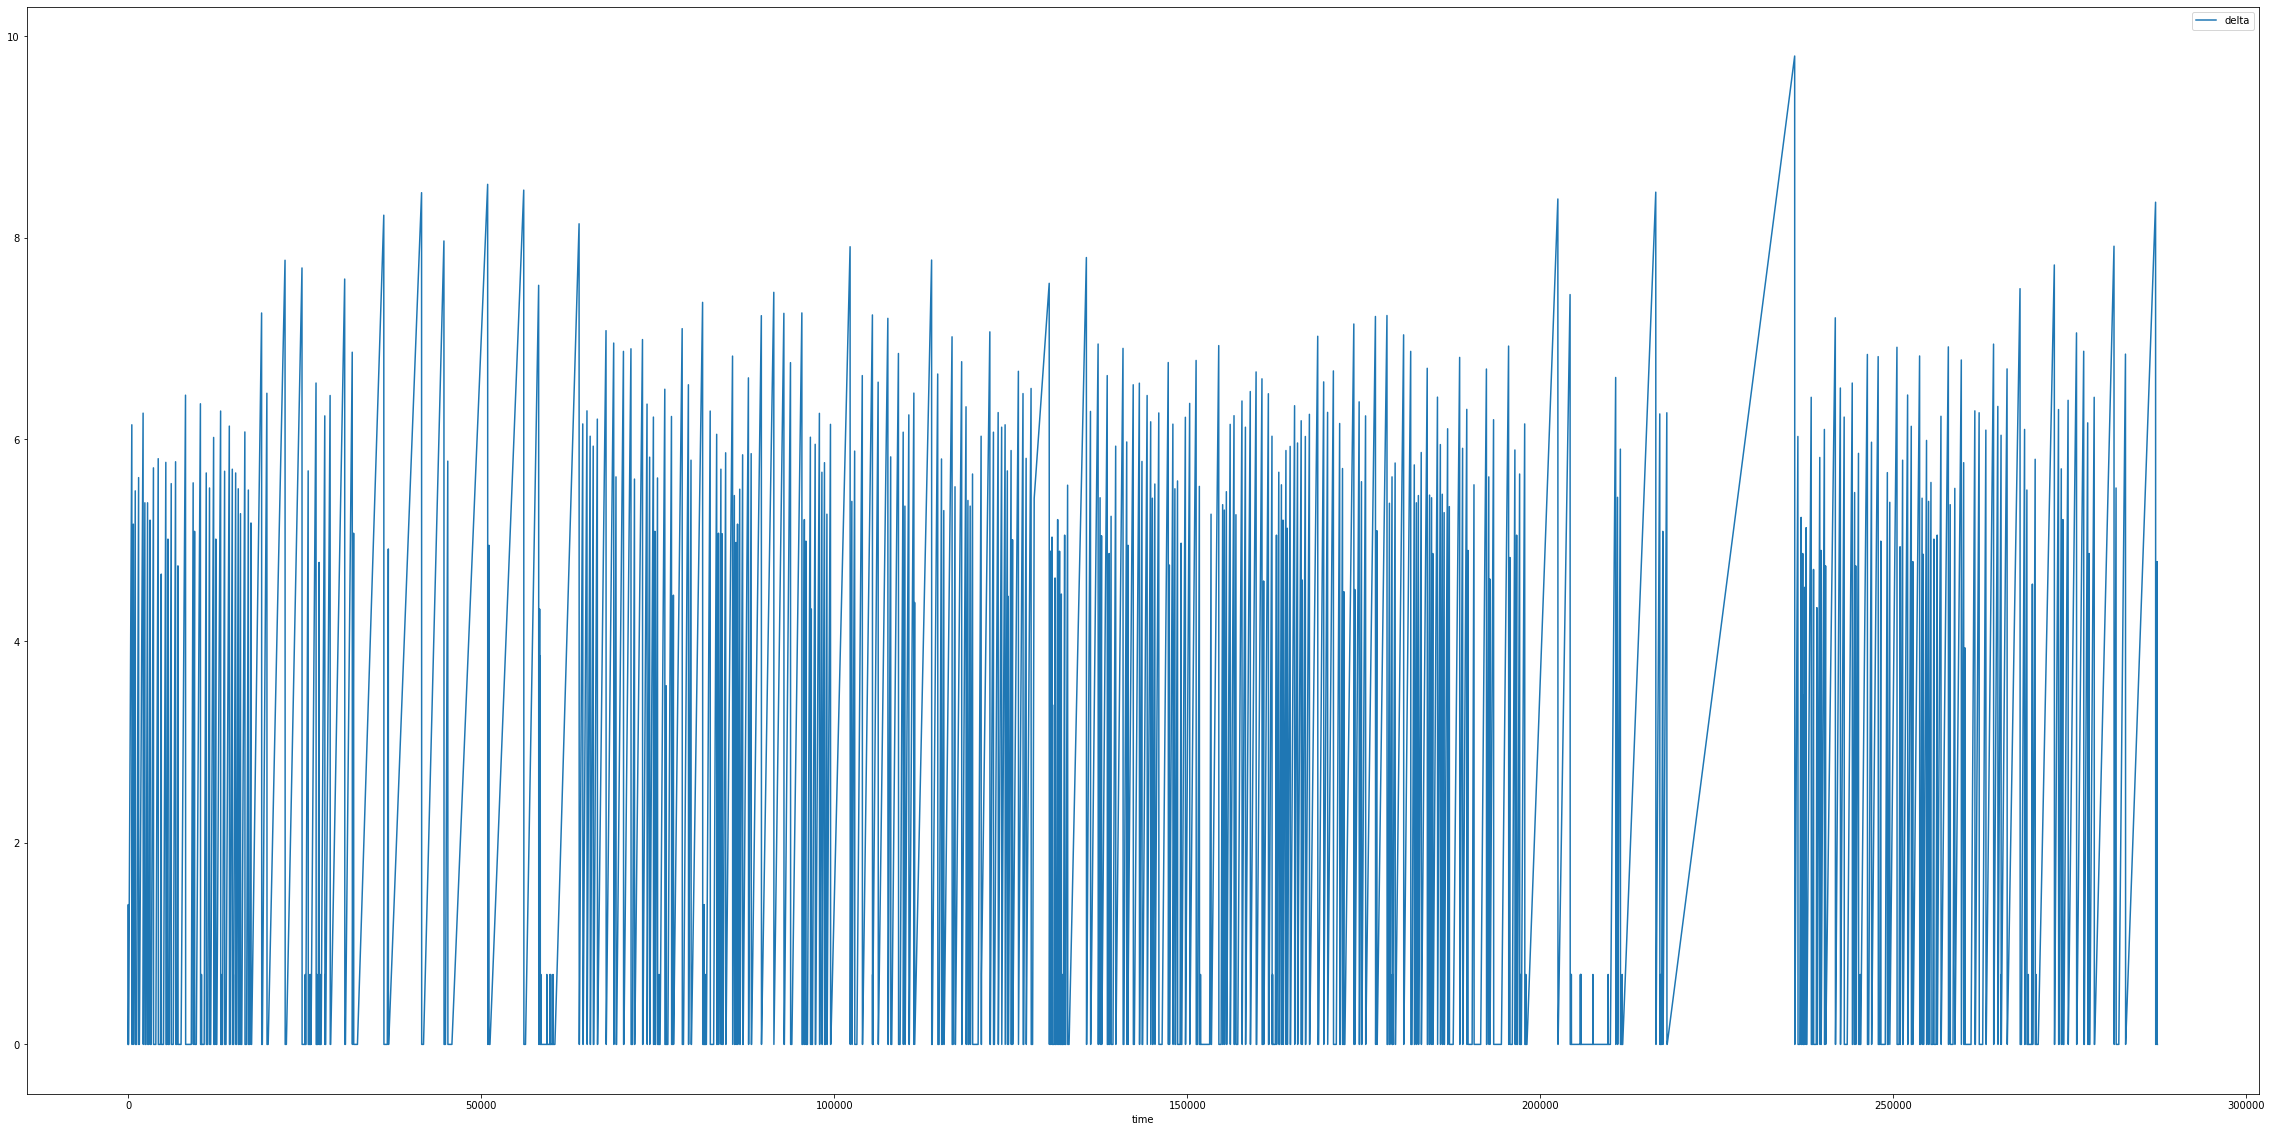

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from math import log
data = pd.read_csv('grupo.csv')
df_17 = data[data['user'] == 16]
series_delta = df_17['time']
all_times = [data[data['user'] == user] for user in (11,12,13,16,17)]
series_delta = [0]+[t1-t0 for t1, t0 in zip(series_delta, series_delta[1:])]
series_delta = [0]+[log(max(t1-t0,1)) for t1, t0 in zip(series_delta, series_delta[1:])]
df_17.insert(2,"delta",series_delta, True)
df_17.plot(x='time', y="delta", figsize=(40,20))


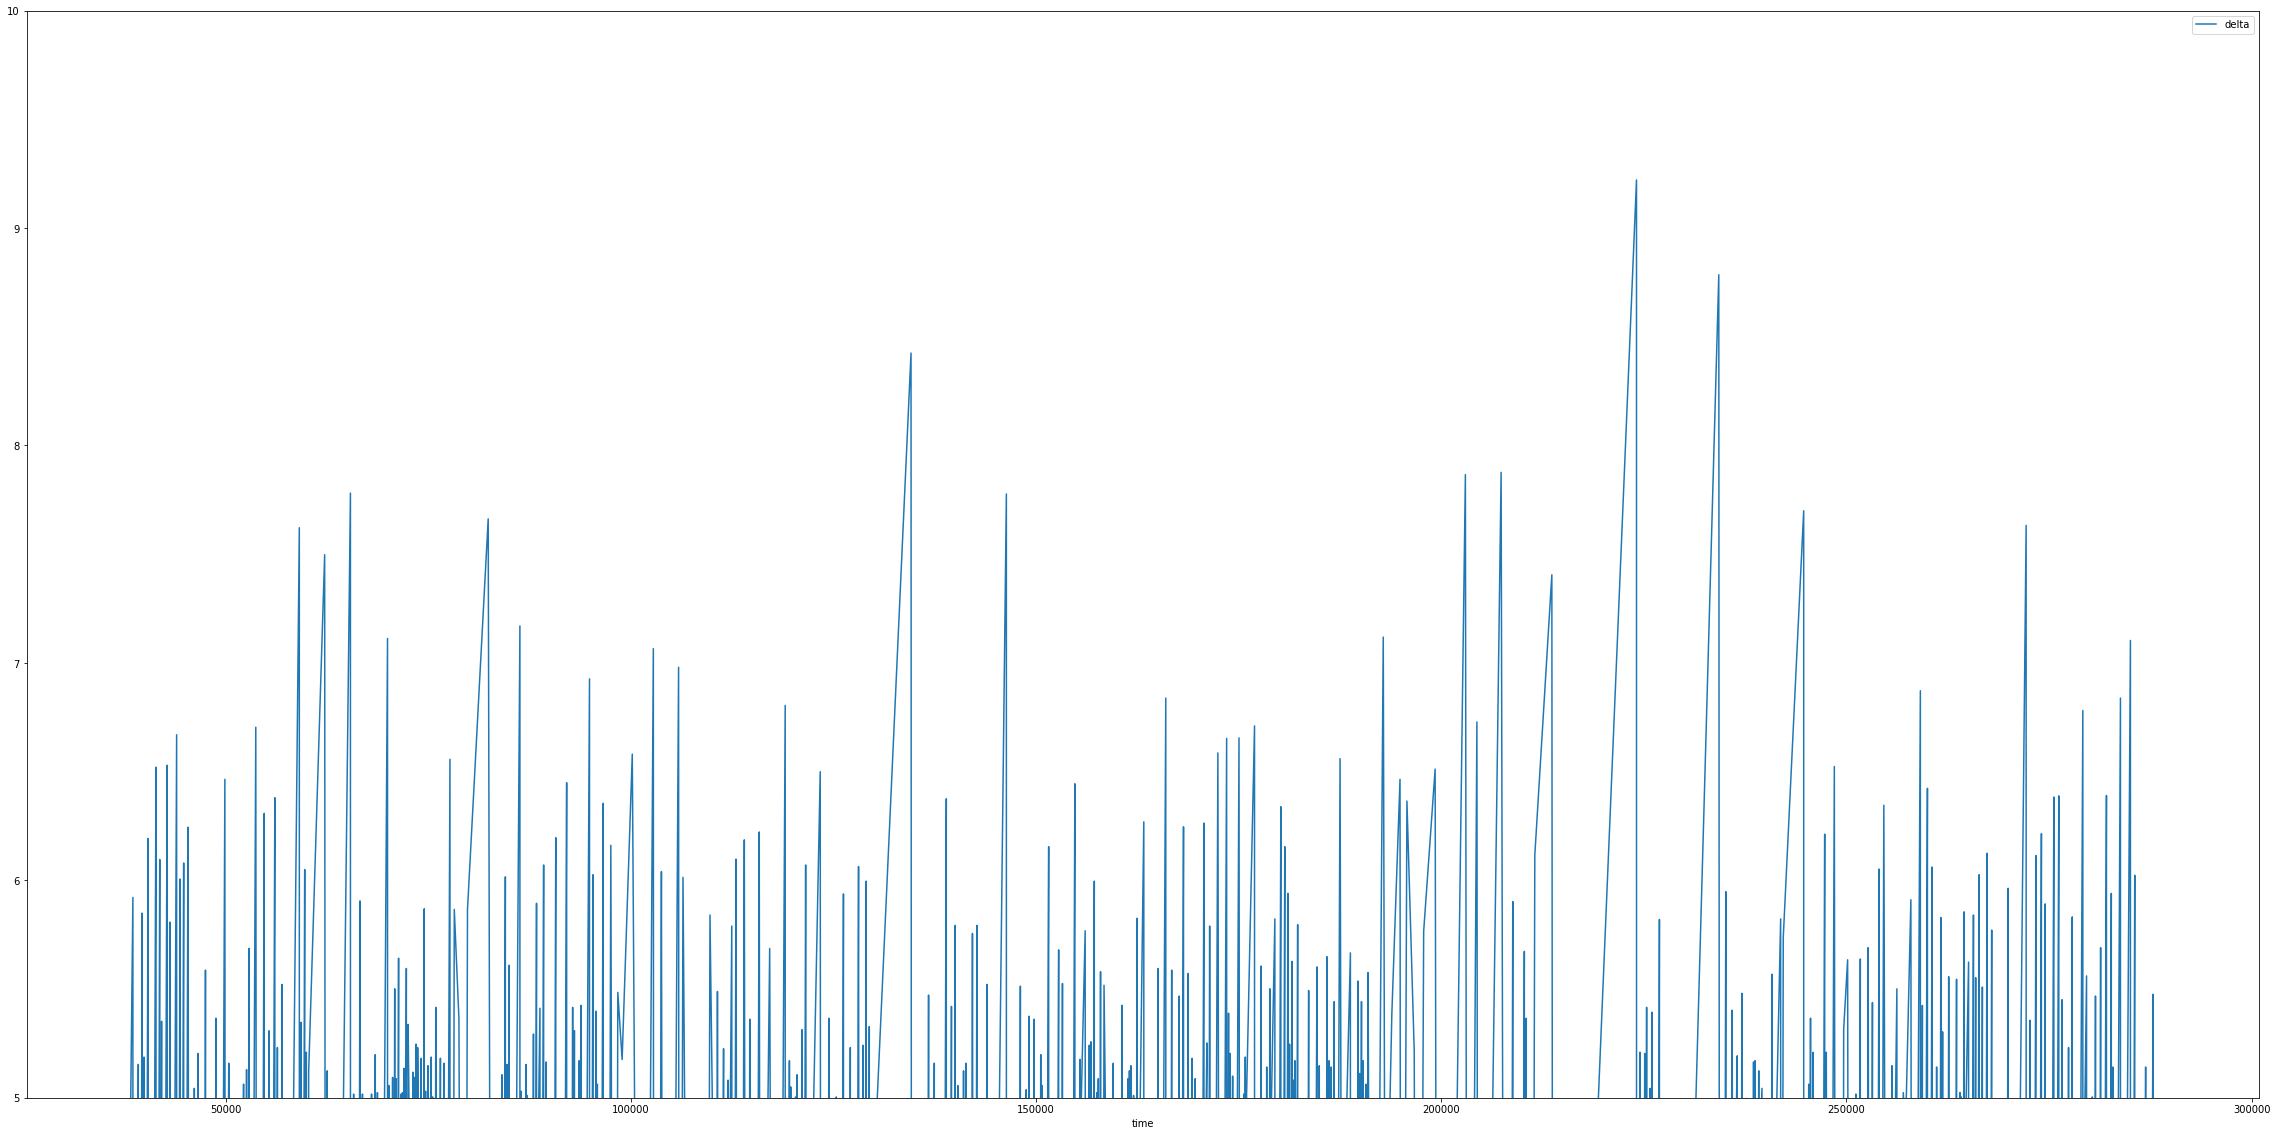

In [94]:
import pandas as pd
from matplotlib import pyplot as plt
from math import log
data = pd.read_csv('grupo.csv')
df_user = data[data['user'] == 12]
#df_teleo = df_user[(df_user['act'] == 'sro') | (df_user['act'] == 'dcr')] # sna dcr rpe rco rca rro pco per cna']
df_teleo = df_user[(df_user['act'] != 'aro')&(df_user['act'] != 'aga')
                   &(df_user['act'] != 'ana')&(df_user['act'] != 'aca')]
series_delta = df_teleo['time']
series_delta = [0]+[t1-t0 for t1, t0 in zip(series_delta, series_delta[1:])]
series_delta = [0]+[log(max(t1-t0,1)) for t1, t0 in zip(series_delta, series_delta[1:])]
df_teleo.insert(2,"delta",series_delta, True)
df_teleo.plot(x='time', y="delta", ylim=(5,10), figsize=(40,20))


In [ ]:
[]